In [1]:
import pandas as pd
import numpy as np

In [2]:
# read in data
wine_df = pd.read_csv('wine.data', header = None)

In [3]:
# view data
wine_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
# add in column names
wine_df.columns = ['Label','Alcohol','Malic acid','Ash','Alcalinity of ash', 'Magnesium','Total phenols',
                    'Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue',
                    'OD280/OD315 of diluted wines','Proline']

In [5]:
# view data
wine_df

,Label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [6]:
# import libraries
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [7]:
# define predictor and response variables
X = wine_df.iloc[:, 1:]
y = wine_df.iloc[:, :1]

### 1a.

In [8]:
# create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 1)
# fit the classifier 
knn.fit(X, y.values.ravel())

# calculate cross validation scores
cv_scores = cross_val_score(knn, X, y.values.ravel(), cv=LeaveOneOut(),scoring='accuracy')

# print scores
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

cv_scores mean:0.7696629213483146


In [9]:
# generate confusion matrix
confusion_matrix(y, knn.predict(X))

array([[59,  0,  0],
       [ 0, 71,  0],
       [ 0,  0, 48]], dtype=int64)

### 1b.

In [10]:
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

In [11]:
cv1 = []

# find 20 different values
for i in range(2, 100, 5):
    cv1.append(i)
    
cv1

[2, 7, 12, 17, 22, 27, 32, 37, 42, 47, 52, 57, 62, 67, 72, 77, 82, 87, 92, 97]

In [12]:
# define function
def calc(cv):
    # calculate cross validation scores
    cv_kfold_scores = cross_val_score(knn, X, y.values.ravel(), cv=cv ,scoring='accuracy') 
    return np.mean(cv_kfold_scores)

In [13]:
accuracy = []

for k in cv1:
  # calculate folds
  cv = KFold(n_splits=k, shuffle=True, random_state=0)
  # apply function
  k_mean = calc(cv)
  # append values
  accuracy.append(k_mean)
  # print values
  print('-> folds=%d, accuracy=%.3f' % (k, k_mean))

-> folds=2, accuracy=0.713
-> folds=7, accuracy=0.764
-> folds=12, accuracy=0.780
-> folds=17, accuracy=0.776
-> folds=22, accuracy=0.781
-> folds=27, accuracy=0.774
-> folds=32, accuracy=0.774
-> folds=37, accuracy=0.772
-> folds=42, accuracy=0.776
-> folds=47, accuracy=0.764
-> folds=52, accuracy=0.772
-> folds=57, accuracy=0.770
-> folds=62, accuracy=0.766
-> folds=67, accuracy=0.761
-> folds=72, accuracy=0.769
-> folds=77, accuracy=0.773
-> folds=82, accuracy=0.770
-> folds=87, accuracy=0.772
-> folds=92, accuracy=0.772
-> folds=97, accuracy=0.763


Text(0, 0.5, 'Accuracy')

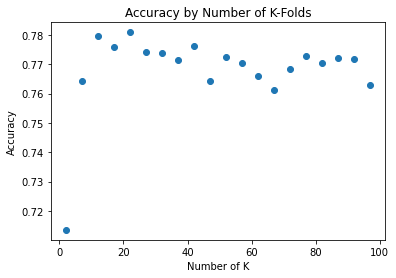

In [14]:
plt.scatter(cv1, accuracy)
plt.title('Accuracy by Number of K-Folds')
plt.xlabel('Number of K')
plt.ylabel('Accuracy')

### 1c.

In [15]:
from sklearn import preprocessing

In [16]:
# normalize data
scaler = preprocessing.StandardScaler().fit(X)
X_transformed = scaler.transform(X)

In [17]:
# create KNN classifier
knn1 = KNeighborsClassifier(n_neighbors = 1)
# fit the classifier 
knn1.fit(X_transformed, y.values.ravel())

KNeighborsClassifier(n_neighbors=1)

In [18]:
# calculate cross validation scores
cv_scores1 = cross_val_score(knn1, X_transformed, y.values.ravel(), cv=LeaveOneOut(),scoring='accuracy')

# print scores
print('cv_scores mean:{}'.format(np.mean(cv_scores1)))

cv_scores mean:0.9550561797752809


In [19]:
# generate confusion matrix
confusion_matrix(y, knn1.predict(X_transformed))

array([[59,  0,  0],
       [ 0, 71,  0],
       [ 0,  0, 48]], dtype=int64)

Yes, the normalization helped with performance and boosted the accuracy of the classifier.

### 2.

In [20]:
from scipy.stats import multivariate_normal

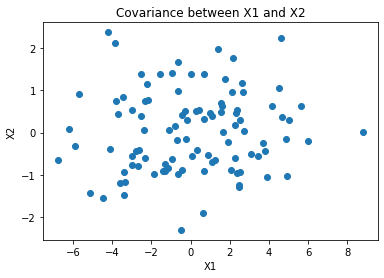

In [21]:
# mean
mean = np.array([0,0])

# covariance 
cov = [0]

for i, j in enumerate(cov):
     
    # covariance matrix
    cov = np.array([[9, j], [j, 1]])
     
    # create Gaussian  distribution
    distribution = multivariate_normal(cov = cov, mean = mean)
     
    # draw 100 samples
    samp = distribution.rvs(size = 100)
     
    # plotting distribution
    plt.plot(samp[:,0],samp[:,1], 'o')
    plt.title('Covariance between X1 and X2')
    plt.xlabel('X1')
    plt.ylabel('X2')
     
plt.show()

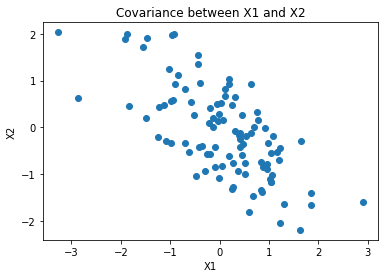

In [22]:
# mean
mean = np.array([0,0])

# covariance 
cov = [-0.75]
 
for i, j in enumerate(cov):
     
    # covariance matrix
    cov = np.array([[1, j], [j, 1]])
     
    # create Gaussian  distribution
    distribution = multivariate_normal(cov = cov, mean = mean)
     
    # draw 100 samples
    samp = distribution.rvs(size = 100)
     
    # plotting distribution
    plt.plot(samp[:,0],samp[:,1], 'o')
    plt.title('Covariance between X1 and X2')
    plt.xlabel('X1')
    plt.ylabel('X2')
     
plt.show()